# **Zidio CVD Project**


## Import Packages, Class and Functions

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

## **Load data**

In [98]:
data_url = "https://raw.githubusercontent.com/Mayorbytes/Zidio-CVD-Project/main/Heart_data.csv"
df = pd.read_csv(data_url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
1588,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
1589,56.0,0.0,NaN,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
1590,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


## **Data Exploration**

In [99]:
print("The shape of the dataset:", df.shape)

The shape of the dataset: (1592, 14)


In [100]:
print(df.info(), "\n\nDataset description:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB
None 

Dataset description:
                age         sex           cp     trestbps         chol  \
count  1513.000000  1561.00000  1433.000000  1592.000000  1529.000000   
mean     54.427627     0.68802     1.7313

## **Data Preprocessing**

### **Finding missing values**

In [112]:
df.isnull().any(axis=0)

age                         False
sex                         False
cp                          False
trestbps                    False
chol                        False
fbs                         False
restecg                     False
thalach                     False
exang                       False
oldpeak                     False
slope                       False
ca                          False
thal                        False
target                      False
age_trestbps_interaction    False
dtype: bool

In [113]:
print("Sum of missing values per column:\n", df.isnull().sum())

Sum of missing values per column:
 age                         0
sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
target                      0
age_trestbps_interaction    0
dtype: int64


### **Handling missing values**

#### Continous variables

In [119]:
df['age_trestbps_interaction'] = df['age'] * df['trestbps']

cont_num_var = df[["age", "trestbps", "chol", "thalach", "oldpeak", "age_trestbps_interaction"]]
cont_num_var

<ipython-input-119-a57e7fdda1f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_trestbps_interaction'] = df['age'] * df['trestbps']


,age,trestbps,chol,thalach,oldpeak,age_trestbps_interaction
0,63.0,145.0,233.0,150.0,2.3,9135.0
2,67.0,120.0,229.0,129.0,2.6,8040.0
3,37.0,130.0,250.0,187.0,3.5,4810.0
4,41.0,130.0,204.0,172.0,1.4,5330.0
5,56.0,120.0,236.0,178.0,0.8,6720.0
...,...,...,...,...,...,...
1585,49.0,130.0,266.0,171.0,0.6,6370.0
1587,52.0,172.0,199.0,162.0,0.5,8944.0
1588,44.0,120.0,263.0,173.0,0.0,5280.0
1589,56.0,140.0,294.0,153.0,1.3,7840.0


In [120]:
for i in cont_num_var:
    df[i].fillna(df[i].mean(), inplace=True)
cont_num_var.head(20)

<ipython-input-120-2de52d4e5364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].fillna(df[i].mean(), inplace=True)


,age,trestbps,chol,thalach,oldpeak,age_trestbps_interaction
0,63.000000,145.0,233.000000,150.0,2.300000,9135.000000
2,67.000000,120.0,229.000000,129.0,2.600000,8040.000000
3,37.000000,130.0,250.000000,187.0,3.500000,4810.000000
4,41.000000,130.0,204.000000,172.0,1.400000,5330.000000
5,56.000000,120.0,236.000000,178.0,0.800000,6720.000000
7,57.000000,120.0,354.000000,163.0,0.600000,6840.000000
9,53.000000,140.0,203.000000,155.0,3.100000,7420.000000
10,54.427627,140.0,192.000000,148.0,0.400000,7619.867812
11,56.000000,140.0,294.000000,153.0,1.300000,7840.000000
13,44.000000,120.0,263.000000,173.0,0.000000,5280.000000


#### Categorical Variables (binary and multi-class)

In [121]:
columns_to_drop = cont_num_var.columns.tolist() + ["target"]
categ_var = df.drop(columns=columns_to_drop)
categ_var

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,1.0,1,2.0,0,3.0,0.0,6.0
2,1,4.0,0,2.0,1,2.0,2.0,7.0
3,1,3.0,0,0.0,0,3.0,0.0,3.0
4,0,2.0,0,2.0,0,1.0,0.0,3.0
5,1,2.0,0,0.0,0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...
1585,1,2.0,0,0.0,0,1.0,0.0,3.0
1587,1,3.0,1,0.0,0,1.0,0.0,7.0
1588,1,2.0,0,0.0,0,1.0,0.0,7.0
1589,0,0.0,0,2.0,0,2.0,0.0,3.0


In [122]:
for j in categ_var:
    df[j].fillna(df[j].mode().iloc[0], inplace=True)
categ_var.head(20)

<ipython-input-122-882b2ce59632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j].fillna(df[j].mode().iloc[0], inplace=True)
<ipython-input-122-882b2ce59632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j].fillna(df[j].mode().iloc[0], inplace=True)
<ipython-input-122-882b2ce59632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j].fillna(df[j].mode().iloc[0], inplace=True)
<ipython-input-122-882b2ce59632>:2: SettingWit

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,1.0,1,2.0,0,3.0,0.0,6.0
2,1,4.0,0,2.0,1,2.0,2.0,7.0
3,1,3.0,0,0.0,0,3.0,0.0,3.0
4,0,2.0,0,2.0,0,1.0,0.0,3.0
5,1,2.0,0,0.0,0,1.0,0.0,3.0
7,0,4.0,0,0.0,1,1.0,0.0,3.0
9,1,4.0,1,2.0,1,3.0,0.0,7.0
10,1,4.0,0,0.0,0,2.0,0.0,6.0
11,0,2.0,0,2.0,0,2.0,0.0,3.0
13,1,2.0,0,0.0,0,1.0,0.0,7.0


In [123]:
df.isnull().any(axis=0)

age                         False
sex                         False
cp                          False
trestbps                    False
chol                        False
fbs                         False
restecg                     False
thalach                     False
exang                       False
oldpeak                     False
slope                       False
ca                          False
thal                        False
target                      False
age_trestbps_interaction    False
dtype: bool

### **Conversion of Dichotomous Float Variables to Integer"**


In [124]:
#sex
df["sex"] = df["sex"].astype(int)
#fbs
df["fbs"] = df["fbs"].astype(int)
#exang
df["exang"] = df["exang"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 1590
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1389 non-null   float64
 1   sex                       1389 non-null   int64  
 2   cp                        1389 non-null   float64
 3   trestbps                  1389 non-null   float64
 4   chol                      1389 non-null   float64
 5   fbs                       1389 non-null   int64  
 6   restecg                   1389 non-null   float64
 7   thalach                   1389 non-null   float64
 8   exang                     1389 non-null   int64  
 9   oldpeak                   1389 non-null   float64
 10  slope                     1389 non-null   float64
 11  ca                        1389 non-null   float64
 12  thal                      1389 non-null   float64
 13  target                    1389 non-null   int64  
 14  age_tres

<ipython-input-124-3211d50c4421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = df["sex"].astype(int)
<ipython-input-124-3211d50c4421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fbs"] = df["fbs"].astype(int)
<ipython-input-124-3211d50c4421>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

###**Handling Non-Dichotomous Target Variable**



In [125]:
unique_value_count = df["target"].value_counts()
print(f"Number of unique values in target: {unique_value_count}" )

Number of unique values in target: 1    730
0    659
Name: target, dtype: int64


In [127]:
df = df[df["target"].isin([0,1])]
df["target"].describe()

count    1389.000000
mean        0.525558
std         0.499526
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

### **Data Separation**

In [128]:
x = df.drop(columns=["target"])
y = df["target"]

## **Data Visualization**

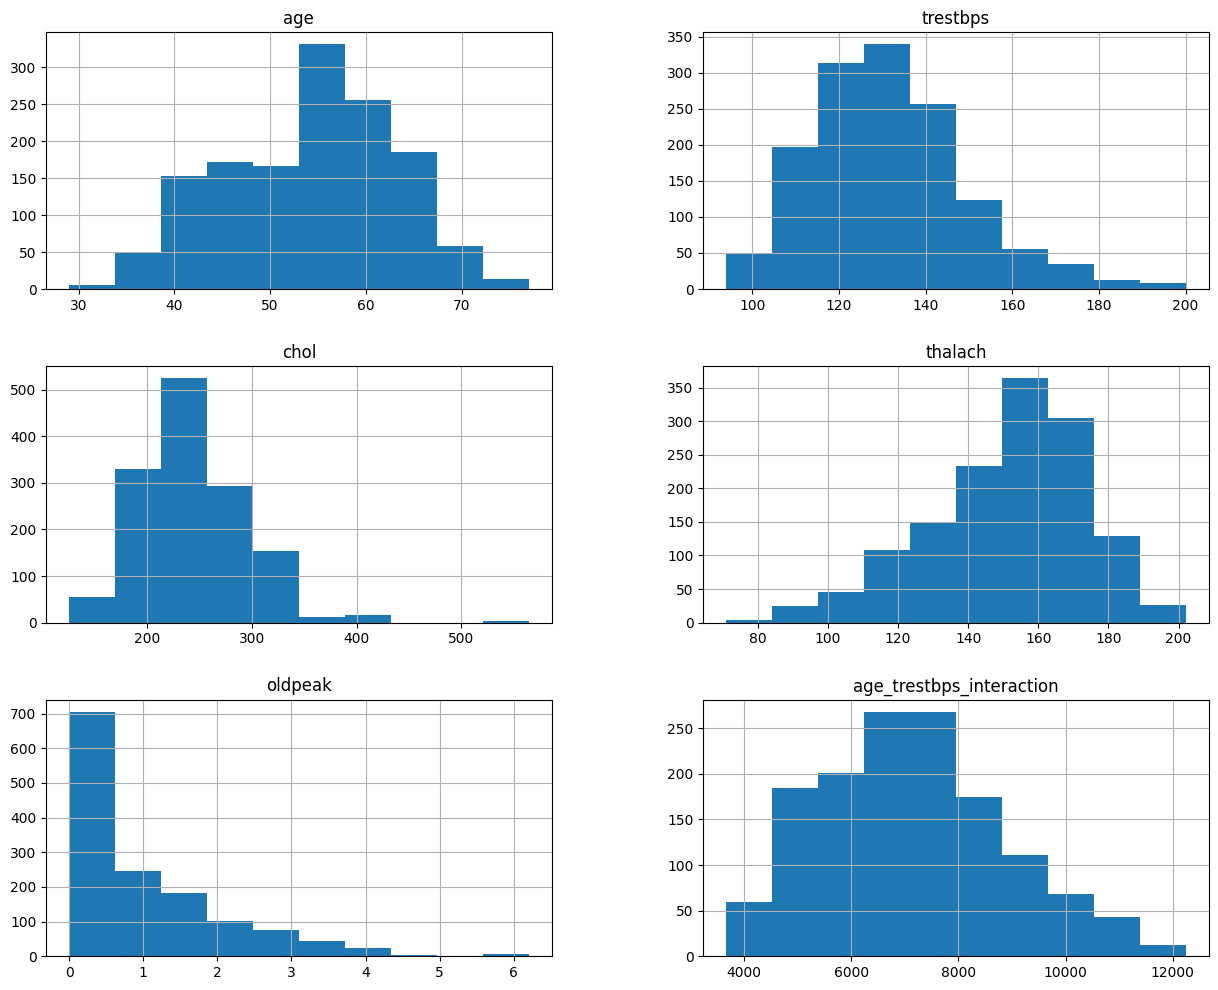

In [129]:
cont_num_var.hist(figsize=(15, 12))
plt.show()

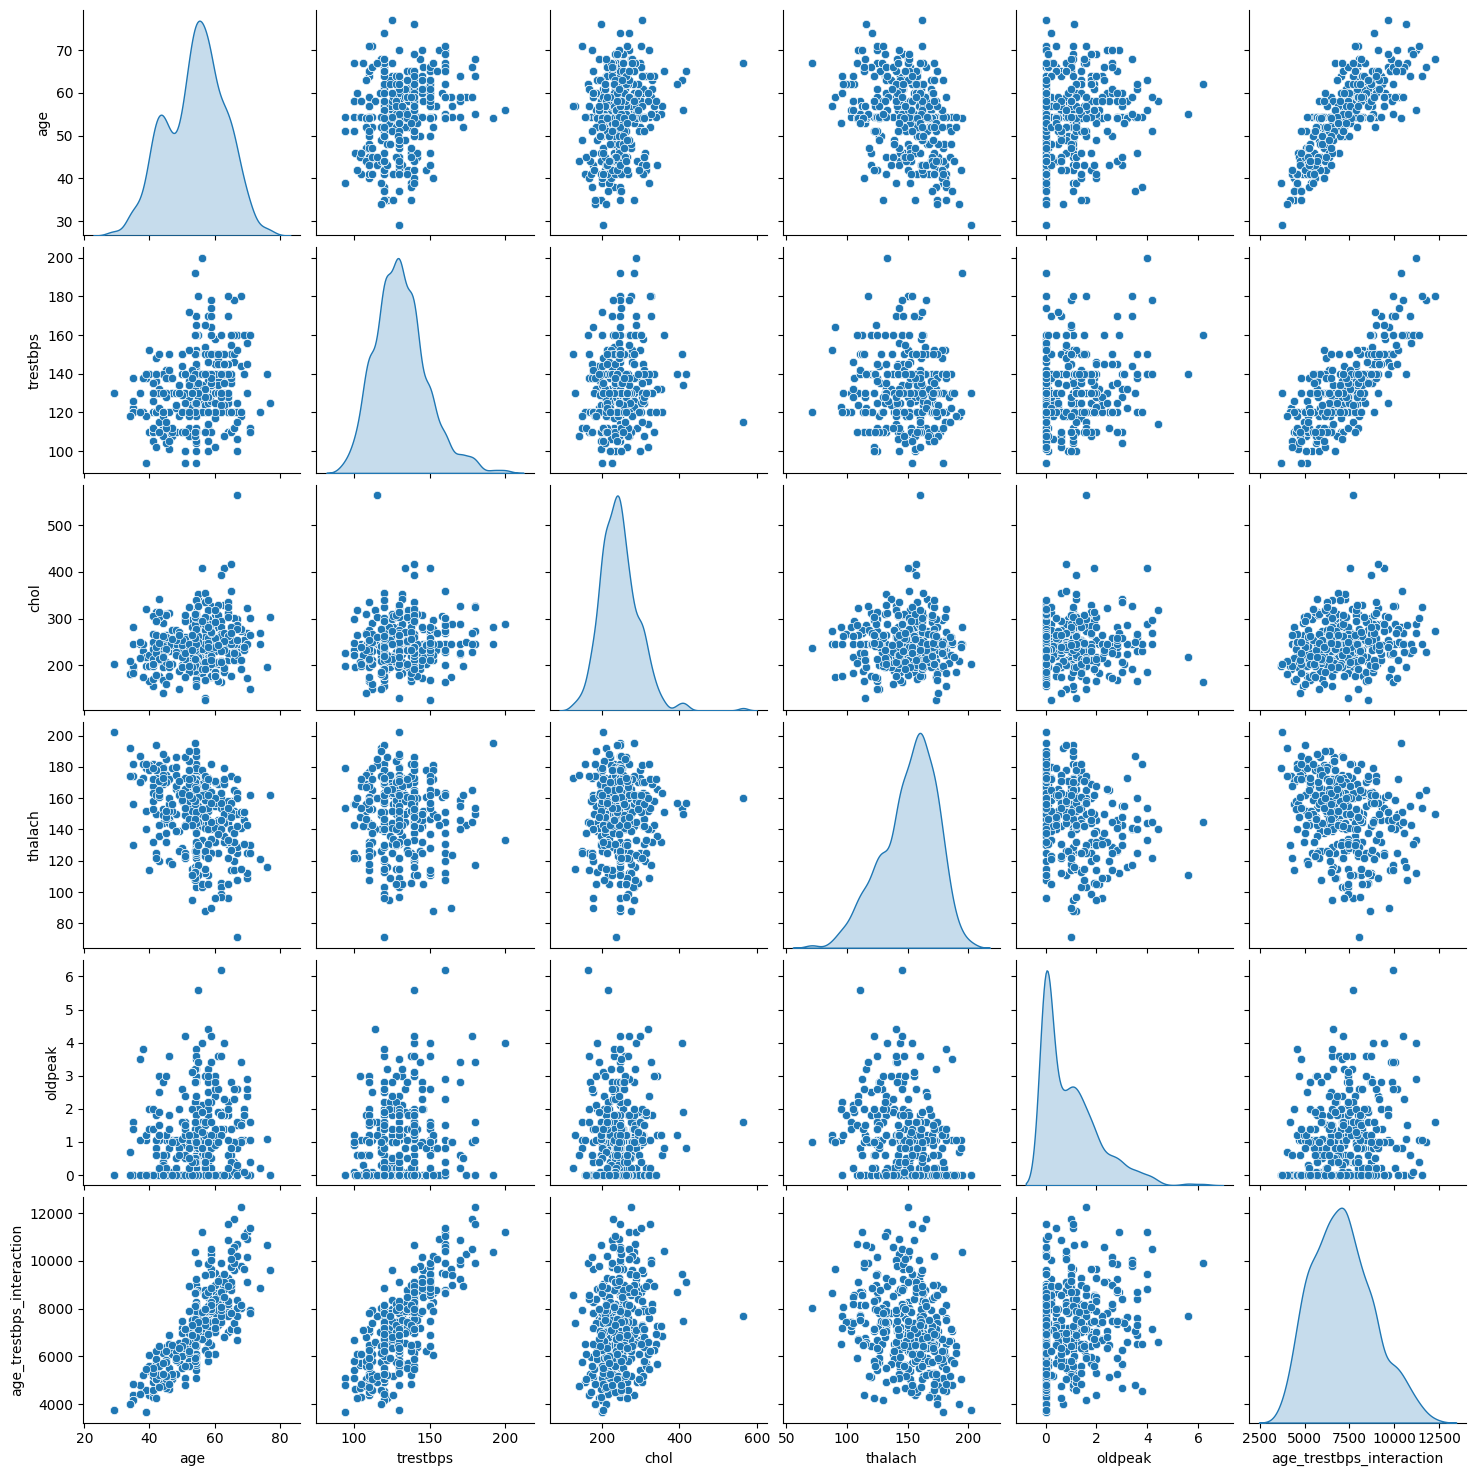

In [130]:
sns.pairplot(cont_num_var, diag_kind="kde")
plt.show()

## **Correlation Matrix**

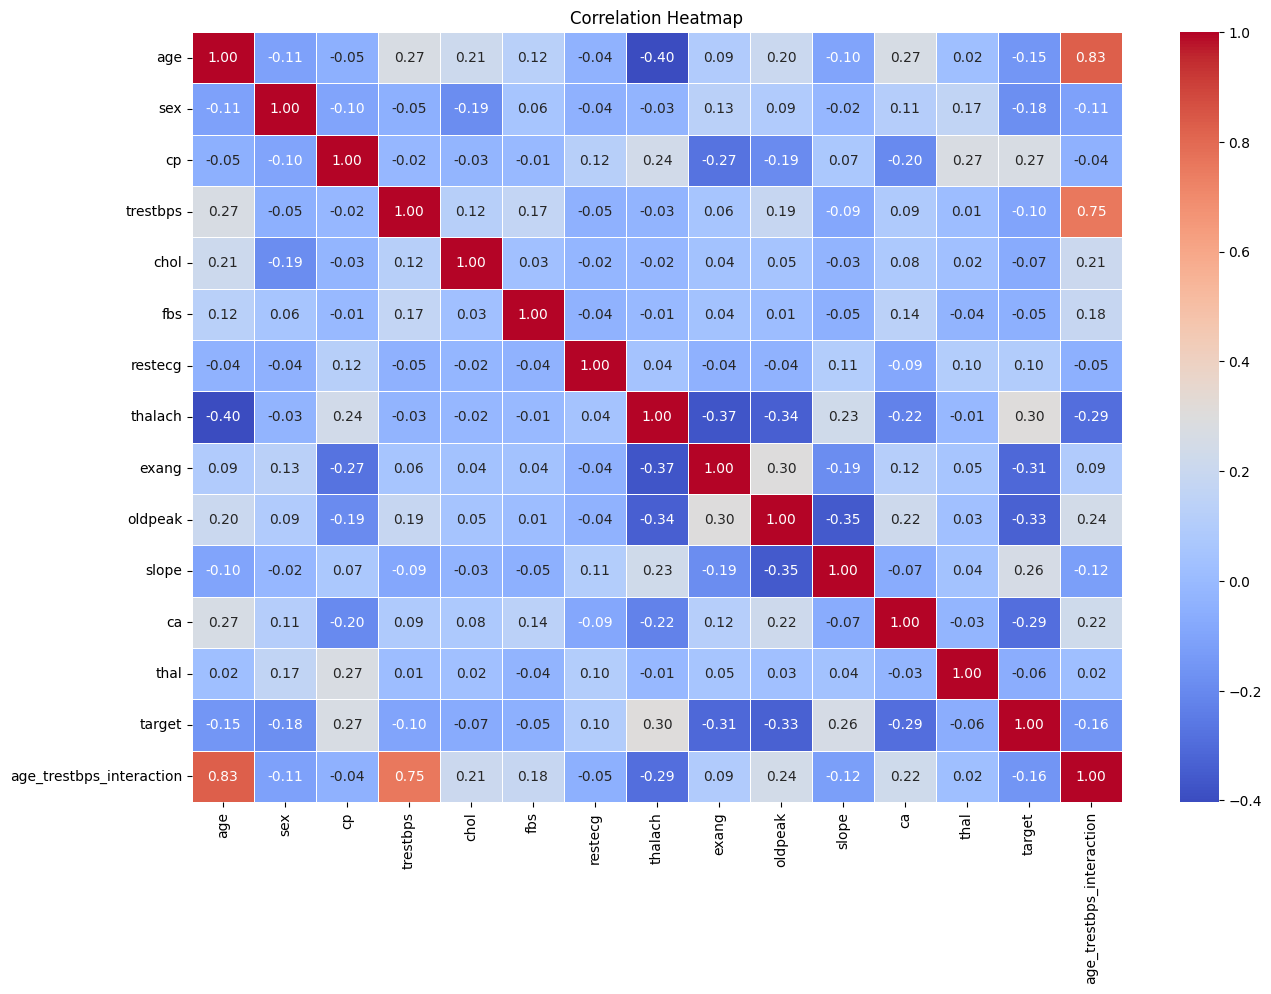

In [131]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Data Splitting**

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

### **Standardizing Variable**

In [133]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

## **Model Building**

In [134]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [135]:
results = {}
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    results[model_name] ={"Accuracy":accuracy, "Recall":recall, "Precision":precision, "AUC":auc}

### **Summary Table**

In [136]:
summary_df = pd.DataFrame(results)

### **Best Perfoming Model**

In [137]:
best_model = summary_df.mean().idxmax()
print("Performance metrics for each Model:")
print(summary_df)
print("\nBest-Performing mMdel:", best_model)


Performance metrics for each Model:
           Random Forest       SVM  k-Nearest Neighbors  Logistic Regression  \
Accuracy        0.784173  0.823741             0.776978             0.755396   
Recall          0.792857  0.942857             0.821429             0.814286   
Precision       0.781690  0.763006             0.756579             0.730769   
AUC             0.784110  0.822878             0.776656             0.754969   

           Gradient Boosting  
Accuracy            0.769784  
Recall              0.828571  
Precision           0.743590  
AUC                 0.769358  

Best-Performing mMdel: SVM
